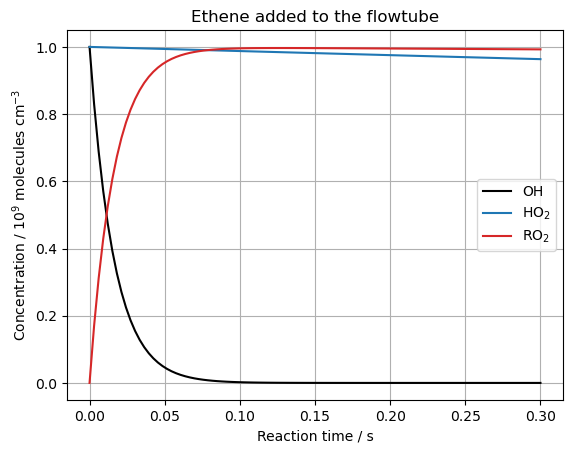

In [2]:
#Author: [Abigail McConnell]
#Date Created: 2024-11-16
#Last Modified: 2025-05-26
#Script Name: Ethene_OH_kinetics.py
#Description:
#    This script models the kinetics of the reactions inside the flowtube with OH and ethene (and the other side reactions)

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from chempy.kinetics.ode import get_odesys
from chempy import Substance, ReactionSystem, Reaction

# Define initial conditions
oh0 = 1e9    # Initial concentration of OH (molecules/cm^3)
ho20 = 1e9   # Initial concentration of HO2 (molecules/cm^3)
c2h40 = 8e12 # Initial concentration of C2H4 (molecules/cm^3)
model_time = np.linspace(0, 0.3, 100) # Simulation time (s)

# Define substances 
substances = {
    "OH": Substance("OH"),
    "HO2": Substance("HO2"),
    "C2H4": Substance("C2H4"),
    "RO2": Substance("RO2"),  # Placeholder name for intermediate radical
    "H2O2": Substance("H2O2"),
    "O2": Substance("O2")
#    "Light": Substance("Light")
}

# Define reactions explicitly
reactions = [
    Reaction({"C2H4": 1, "OH": 1}, {"RO2": 1}, 7.7e-12),  # Simplified intermediate as "RO2"
    Reaction({"RO2": 1, "HO2": 1}, {}, 1e-11),
    Reaction({"HO2": 2}, {"H2O2": 1, "O2": 1}, 5e-11),
    Reaction({"HO2": 1}, {}, 0.016),
    Reaction({"RO2": 1}, {}, 0.016) # wall loss
#    Reaction({"HO2": 1}, {}, 5e-11)
]

# Define the reaction system
rsys = ReactionSystem(reactions, substances)

# Set up the ODE system with params=True to avoid parameter issues
odesys, extra = get_odesys(rsys, params=True)

# Initial concentrations
c0 = defaultdict(float, {'OH': oh0, 'HO2': ho20, 'C2H4': c2h40})

# Run the integration
c_result = odesys.integrate(model_time, c0)

# Retrieve indices for species of interest
names = [k for k in rsys.substances]
k_ho2 = names.index("HO2")
k_oh = names.index("OH")
k_ro2 = names.index("RO2")

# Plot results
ho2_mod = c_result.yout[:, k_ho2]
oh_mod = c_result.yout[:, k_oh]
ro2_mod = c_result.yout[:, k_ro2]

plt.plot(model_time, oh_mod/1e9, label='OH', color='k')
plt.plot(model_time, ho2_mod/1e9, label='HO$_2$', color='tab:blue', ls = '-')
plt.plot(model_time, ro2_mod/1e9, label='RO$_2$', color='tab:red', ls = '-')
plt.xlabel('Reaction time / s')
plt.ylabel('Concentration / 10$^9$ molecules cm$^{-3}$')
plt.legend()
#plt.title('Formation of H2O2 in the gas phase')
plt.title('Ethene added to the flowtube')
plt.grid()

#ho2_ethene = ho2_mod
#oh_ethene =oh_mod
#ro2_ethene = ro2_mod

# Comment out to save  
#plt.savefig('ethene + OH in flowtube, time = 0.3 s.png', dpi = 900)